In [1]:
from utils.evaluation_utils import *

In [2]:
setting = "custom"

RUN_FOLDER_ORIGINAL = f'data/{setting}/'
TIME_SERIE_ORIGINAL = os.path.join(RUN_FOLDER_ORIGINAL, "topic_over_time.csv")
TOPICS_FOLDER_ORIGINAL = os.path.join(RUN_FOLDER_ORIGINAL, "topics_representation.csv")
CHANGE_FOLDER_ORIGINAL = os.path.join(RUN_FOLDER_ORIGINAL, "ocpd.csv")
TIME_BIN_ORIGINAL = os.path.join(RUN_FOLDER_ORIGINAL, "time_bin.npy")
ORIGINAL_CHANGE_POINTS = os.path.join(RUN_FOLDER_ORIGINAL, "change_points_original.npy")

RUN_FOLDER_PREDICTED =  f"runs/config_{setting}"
TIME_SERIE_PREDICTED = os.path.join(RUN_FOLDER_PREDICTED, "topic_over_time.csv")
TOPICS_FOLDER_PREDICTED = os.path.join(RUN_FOLDER_PREDICTED, "topics_representation.csv")
CHANGE_FOLDER_PREDICTED = os.path.join(RUN_FOLDER_PREDICTED, "ocpd.csv")
TIME_BIN_PREDICTED = os.path.join(RUN_FOLDER_PREDICTED, "time_bin.npy")

In [3]:
time_serie_original, topics_original, change_points_original = load_files_from_path(
    ts_path=TIME_SERIE_ORIGINAL,
    top_file=TOPICS_FOLDER_ORIGINAL,
    ch_file=CHANGE_FOLDER_ORIGINAL,
    tb_file=TIME_BIN_ORIGINAL
)

time_serie_predicted, topics_predicted, change_points_predicted = load_files_from_path(
    ts_path=TIME_SERIE_PREDICTED,
    top_file=TOPICS_FOLDER_PREDICTED,
    ch_file=CHANGE_FOLDER_PREDICTED,
    tb_file=TIME_BIN_PREDICTED
)

In [4]:
print("\nOCPD Data Original")
display(time_serie_original)

print("\nTopics Data Original")
display(topics_original)
display(topics_original)

print("\nChange Points Data Original")
display(change_points_original)


OCPD Data Original


,0,1,2,3,4
0,256.0,0.0,0.0,153.0,51.0
1,256.0,0.0,0.0,153.0,51.0
2,256.0,0.0,0.0,153.0,51.0
3,51.0,0.0,0.0,307.0,102.0
4,51.0,0.0,0.0,307.0,102.0
5,51.0,0.0,0.0,307.0,102.0
6,204.0,102.0,0.0,0.0,153.0
7,204.0,102.0,0.0,0.0,153.0
8,204.0,102.0,0.0,0.0,153.0
9,204.0,102.0,179.0,0.0,51.0



Topics Data Original


,time_bin,topic,top_words
0,11,0,"['rec', 'autos']"
1,11,1,"['rec', 'sport', 'baseball']"
2,11,2,"['sci', 'med']"
3,11,3,"['sci', 'space']"
4,11,4,"['talk', 'religion', 'misc']"


,time_bin,topic,top_words
0,11,0,"['rec', 'autos']"
1,11,1,"['rec', 'sport', 'baseball']"
2,11,2,"['sci', 'med']"
3,11,3,"['sci', 'space']"
4,11,4,"['talk', 'religion', 'misc']"



Change Points Data Original


,Datetime,0,1,2,3,4
0,0,True,True,True,True,True
1,1,False,False,False,False,False
2,2,False,False,False,False,False
3,3,False,False,False,False,False
4,4,False,False,False,False,False
5,5,False,False,False,False,False
6,6,False,True,False,False,False
7,7,False,False,False,False,False
8,8,False,False,False,False,False
9,9,False,False,True,False,False


In [5]:
print("\nOCPD Data Prediction")
display(time_serie_predicted)

print("\nTopics Data Prediction")
display(topics_predicted)

print("\nChange Points Data Prediction")
display(change_points_predicted)


OCPD Data Prediction


,0,1,2
0,130,116,214
1,124,142,194
2,157,121,182
3,198,135,127
4,181,140,139
5,191,133,136
6,136,141,182
7,152,134,173
8,156,129,174
9,196,136,204



Topics Data Prediction


,time_bin,topic,top_words
0,20250522_163006,0,['field' 'team' 'manager' 'test' 'player' 'gam...
1,20250522_163006,1,['you' 'person' 'man' 'god' 'people' 'does' 'l...
2,20250522_163006,2,['car' 'vehicle' 'ford' 'engine' 'honda' 'bmw'...



Change Points Data Prediction


,Datetime,0,1,2
0,20250522_162027,True,True,True
1,20250522_162102,False,False,False
2,20250522_162153,False,False,False
3,20250522_162244,True,False,False
4,20250522_162339,False,False,False
5,20250522_162432,False,False,False
6,20250522_162524,False,False,False
7,20250522_162618,False,False,False
8,20250522_162716,False,False,False
9,20250522_162808,False,False,False


In [6]:
# change_points_original['Datetime'][change_points_original_chi]

def substitue_words(df_topics_column):
    most_similar = {'harddisk': 'hard-disk', 'forsale': 'sale', 'mousecom': 'mouse', 'configsys': 'config.sys', 'ultrastor': 'store', 'lekoff': 'lakoff', 'soc': 'society', 'sci': 'science', 'med': 'medicine', 'comp': 'computer'}

    final_words = []
    for word in eval(df_topics_column):
        if word in ['rec', 'sys', 'pc']:
            continue
        if word in most_similar.keys():
            final_words.append(word.replace(word, most_similar[word]))
        else:
            final_words.append(word)
    return final_words

topics_original['top_words'] = topics_original['top_words'].apply(substitue_words)
topics_original['top_words'] = topics_original['top_words'].astype(str)
display(topics_original)


,time_bin,topic,top_words
0,11,0,['autos']
1,11,1,"['sport', 'baseball']"
2,11,2,"['science', 'medicine']"
3,11,3,"['science', 'space']"
4,11,4,"['talk', 'religion', 'misc']"


0
1
2
3
4
topic 0 cp at 0
topic 1 cp at 0
topic 1 cp at 6
topic 2 cp at 0
topic 2 cp at 9
topic 3 cp at 0
topic 4 cp at 0


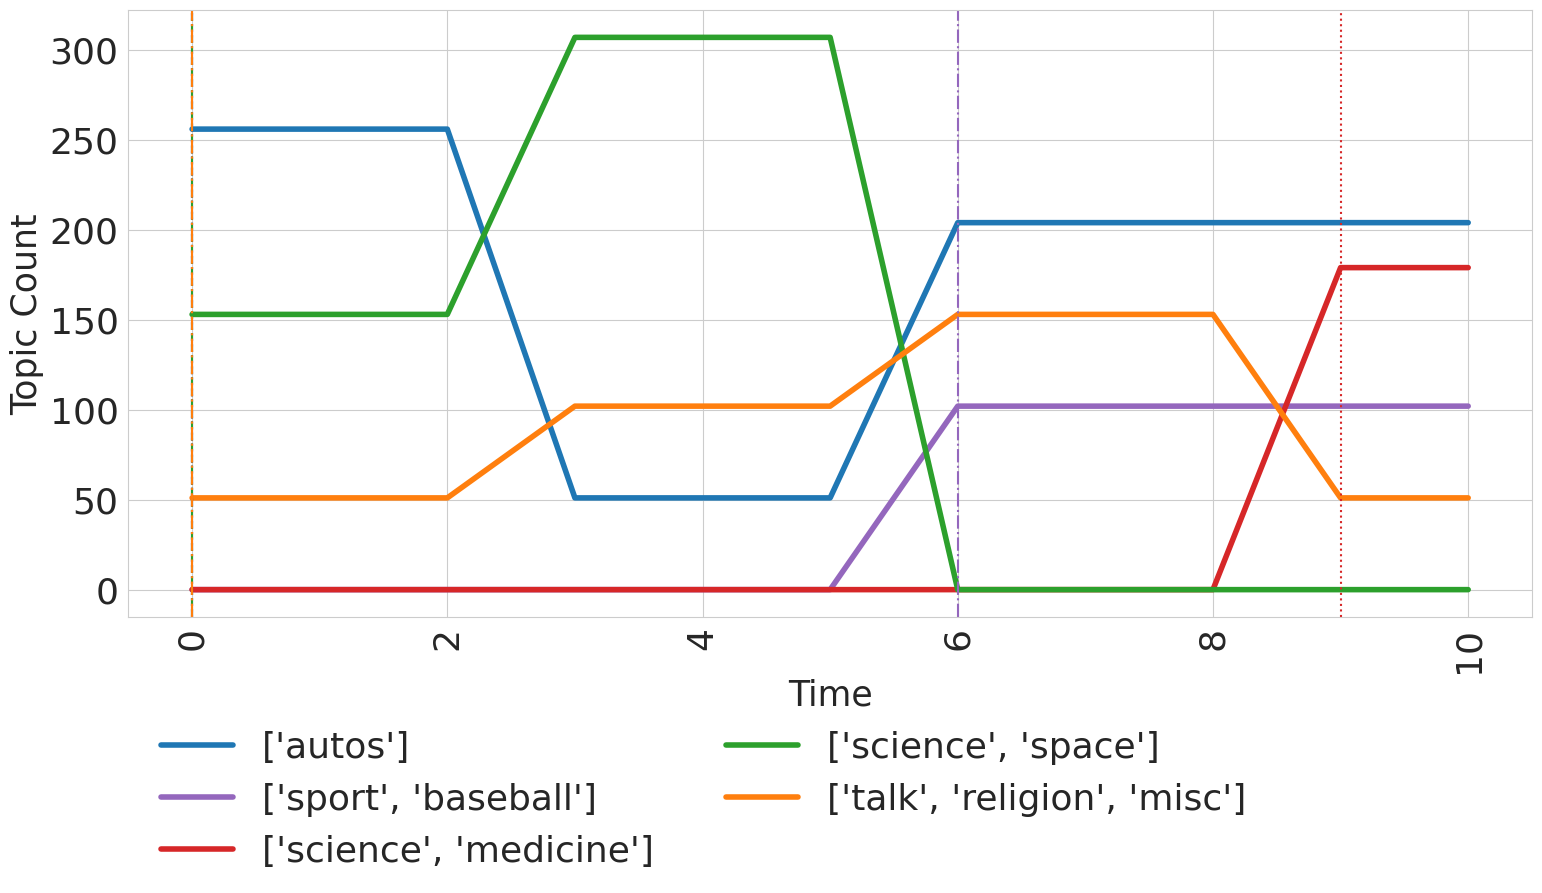

In [7]:
topic_colors = {0: '#1f77b4', 1: '#9467bd', 2: '#d62728', 3: '#2ca02c', 4: '#ff7f0e'}
original_plot, original_top_words = plot_topics_over_time(topics=topics_original[:11],
                                                          change_points=change_points_original[:11],
                                                          time_serie=time_serie_original[:11],
                                                          flag_original_pd=True,
                                                          title=f'',
                                                          rupture_points=change_points_original,
                                                          bbox=(0, -0.3), SMALL_SIZE=26, MEDIUM_SIZE=25, BIGGER_SIZE=25, k=2,
                                                          path_plots_dir='plots',
                                                          file_name_plot=f'{setting}_original.png', topic_colors = topic_colors, scenario=setting)

In [8]:
# change_points_predicted['Datetime'] = change_points_original['Datetime']
change_points_predicted = change_points_predicted.fillna(False)
change_points_predicted_chi = change_points_predicted.loc[change_points_predicted.select_dtypes('bool').sum(axis=1).ge(1)]
change_points_predicted_chi['Datetime']

0     20250522_162027
3     20250522_162244
10    20250522_162905
11    20250522_163006
Name: Datetime, dtype: object

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


0
1


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2
topic 0 cp at 0
topic 0 cp at 3
topic 1 cp at 0
topic 1 cp at 10
topic 1 cp at 11
topic 2 cp at 0


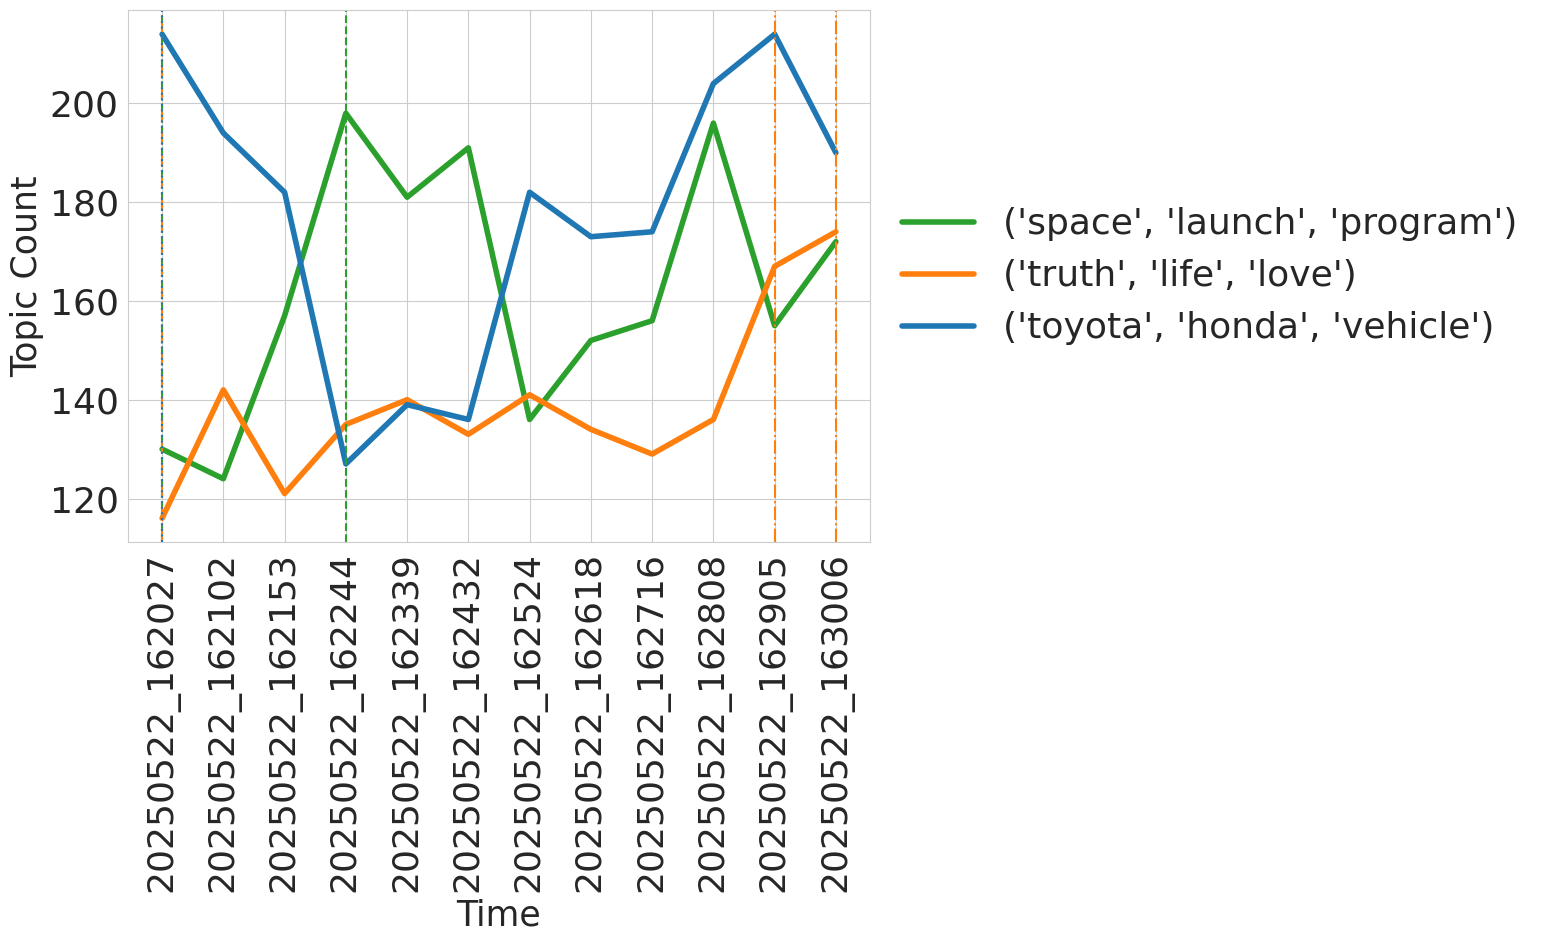

In [9]:
topics_representation_pd_predicted, file_names = load_topic_representations_file(RUN_FOLDER_PREDICTED)
predicted_plot, predicted_top_words = plot_topics_over_time(topics=topics_predicted,
                                                            change_points=change_points_predicted,
                                                            time_serie=time_serie_predicted,
                                                            flag_original_pd=False,
                                                            title=f'',
                                                            run_folder=RUN_FOLDER_PREDICTED,
                                                            rupture_points=change_points_predicted_chi.iloc[1:, :]['Datetime'],
                                                            SMALL_SIZE=26, MEDIUM_SIZE=25, BIGGER_SIZE=25, k=1,
                                                            path_plots_dir='plots',
                                                            file_name_plot=f"{setting}_predicted.png",
                                                            bbox=(1, 0.5), scenario=setting,
                                                            )

#